In [21]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [22]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# To Obtain CSV
df=pd.read_csv("TSLA_2018_2021.csv")
# Show teh data
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500


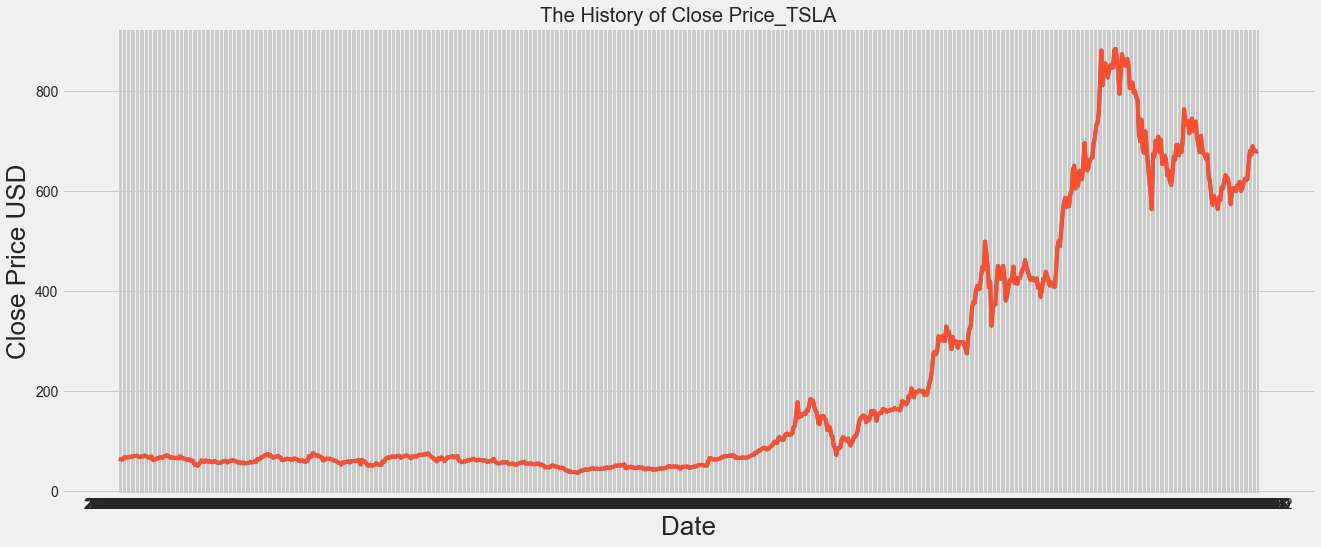

In [23]:
# # To change the format of Date in Python
dates = mdates.date2num(df['Date'])
dates = df['Date']
plt.figure(figsize=(20,8))
plt.title('The History of Close Price_TSLA')

closePrice = df['Close']
plt.plot_date(dates, closePrice,linestyle='solid', marker=None)
plt.plot(dates, closePrice)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Close Price USD', fontsize=26)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len)

838


In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data.shape)
print(scaled_data[:3])


(882, 1)
[[0.03341454]
 [0.03264031]
 [0.03201951]]


In [26]:
# To Create the training data set and create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03341454, 0.03264031, 0.03201951, 0.03248216, 0.03716293,
       0.03652088, 0.03678289, 0.03752643, 0.03711808, 0.03802449,
       0.03970041, 0.03908906, 0.0403755 , 0.040739  , 0.04102934,
       0.03940064, 0.03745326, 0.03868306, 0.04025984, 0.03938411,
       0.04138813, 0.04019374, 0.0388955 , 0.0363887 , 0.03658698,
       0.03919055, 0.0321635 , 0.03102812, 0.03228152, 0.03415336,
       0.03383469, 0.03661059, 0.03694577, 0.03677582, 0.03642883,
       0.03946673, 0.04085468, 0.04212223, 0.04060446, 0.03873263,
       0.0358694 , 0.03685843, 0.03644063, 0.035225  , 0.03619278,
       0.03543744, 0.03498187, 0.03931093, 0.03844465, 0.0348544 ,
       0.03461128, 0.03360809, 0.0317693 , 0.0310588 , 0.03247035,
       0.03071654, 0.02893204, 0.0295552 , 0.02365407, 0.01860271])]
[0.02057368667376782]

[array([0.03341454, 0.03264031, 0.03201951, 0.03248216, 0.03716293,
       0.03652088, 0.03678289, 0.03752643, 0.03711808, 0.03802449,
       0.03970041, 0.03908906, 0.04

In [27]:
# Create the testing data set
# Create a new array containing scaled values (previous 60 days)
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)

# To Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [28]:
print(y_test.shape)

(44, 1)


In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Build the LSTM model
model = Sequential()

#first layer
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#second layer
model.add(LSTM(64, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=200, epochs=30)


model.save('my_tsla_200_model.h5')
a = model.summary 
print (a)

Epoch 1/30
4/4 [==============================] - 3s 178ms/step - loss: 0.0646
Epoch 2/30
4/4 [==============================] - 1s 184ms/step - loss: 0.0150
Epoch 3/30
4/4 [==============================] - 1s 172ms/step - loss: 0.0058
Epoch 4/30
4/4 [==============================] - 1s 165ms/step - loss: 0.0045
Epoch 5/30
4/4 [==============================] - 1s 174ms/step - loss: 0.0029
Epoch 6/30
4/4 [==============================] - 1s 169ms/step - loss: 0.0023
Epoch 7/30
4/4 [==============================] - 1s 163ms/step - loss: 0.0018
Epoch 8/30
4/4 [==============================] - 1s 165ms/step - loss: 0.0018
Epoch 9/30
4/4 [==============================] - 1s 161ms/step - loss: 0.0015
Epoch 10/30
4/4 [==============================] - 1s 166ms/step - loss: 0.0014
Epoch 11/30
4/4 [==============================] - 1s 163ms/step - loss: 0.0013
Epoch 12/30
4/4 [==============================] - 1s 162ms/step - loss: 0.0013
Epoch 13/30
4/4 [==============================] 

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8817d4d0d0>>

In [30]:
###　Linear Regression
from sklearn.linear_model import LinearRegression

In [31]:
### Multiple Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], ), y_train.reshape(-1))

# a = y_train.reshape(-1)
# print (a)

LinearRegression()

In [32]:
###　Linear Regression
from sklearn.linear_model import LinearRegression

### data for linear regression model 2
x_train_2 = np.arange(len(train_data)).reshape(-1, 1)
y_train_2 = dataset[0:int(training_data_len)].reshape(-1)

x_test_2 = np.arange(838, 838+len(y_test)).reshape(-1,1)
y_test_2 = dataset[int(training_data_len):].reshape(-1)
print(x_train_2.shape, y_train_2.shape)
# print(x_test_2.shape)
# print(x_test_2.shape, y_test_2.shape)
# print(x_test_2)

#x_train_2 天數 最小為0 , 最近一天為最大值
# print(x_train_2)

(838, 1) (838,)


In [33]:
# #第838天
# print(y_train_2.shape)

#第838~881
# print(x_test_2)

In [34]:
### Simple Linear Regression Model2
lr_model_2 = LinearRegression()
lr_model_2.fit(x_train_2, y_train_2)

LinearRegression()

In [35]:
# load LSTM model

model = load_model('my_tsla_200_model.h5')
# the models predicted price values 
''' LSTM'''
predictions = model.predict(x_test)
predictions_origin_scale = scaler.inverse_transform(predictions)

''' Multiple Linear Regression'''
"""x_test.shape[0] = 44 days(testing days)"""

lr_predictions = lr_model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1]))
#lr_predictions = lr_model.predict(x_test.reshape(x_test.shape[0],100)

#X1=scaler.inverse_transform(X_scaled)是將標準化後的資料轉換為原始資料。
lr_predictions_origin_scale = scaler.inverse_transform(np.expand_dims(lr_predictions, -1))

'''Simple  Linear Regression 2 '''
lr_predictions_2 = lr_model_2.predict(x_test_2)

In [36]:
a = x_test.shape[0]


b = x_test.shape[1]

print(a,b)

44 60


<ipython-input-37-450efaffc976>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['LSTM_Predictions'] = predictions_origin_scale
<ipython-input-37-450efaffc976>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale
<ipython-input-37-450efaffc976>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

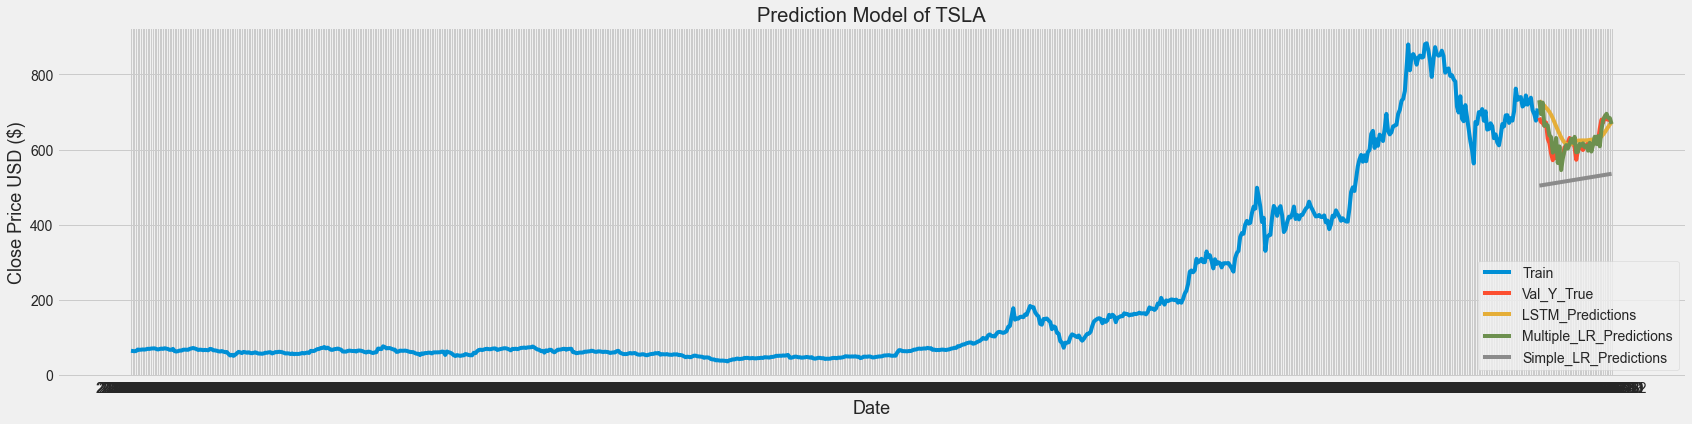

In [37]:
### Plot Training data, testing data and predictions
#training data 
train = data[:training_data_len]

# testing data
valid = data[training_data_len:]
valid['LSTM_Predictions'] = predictions_origin_scale
valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale 
valid['Simple_LR_Predictions'] = lr_predictions_2 
# Visualize the data


plt.figure(figsize=(26,6))
plt.title('Prediction Model of TSLA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

trainDates = dates[:training_data_len]
validDates = dates[training_data_len:]
plt.plot_date(trainDates, train, linestyle='solid', marker=None)
plt.plot_date(validDates, valid, linestyle='solid', marker=None)


plt.legend(['Train', 'Val_Y_True', 'LSTM_Predictions', 'Multiple_LR_Predictions', 'Simple_LR_Predictions'], loc='lower right')

plt.show()

<ipython-input-38-51b614f10d6f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['LSTM_Predictions'] = predictions_origin_scale
<ipython-input-38-51b614f10d6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale
<ipython-input-38-51b614f10d6f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

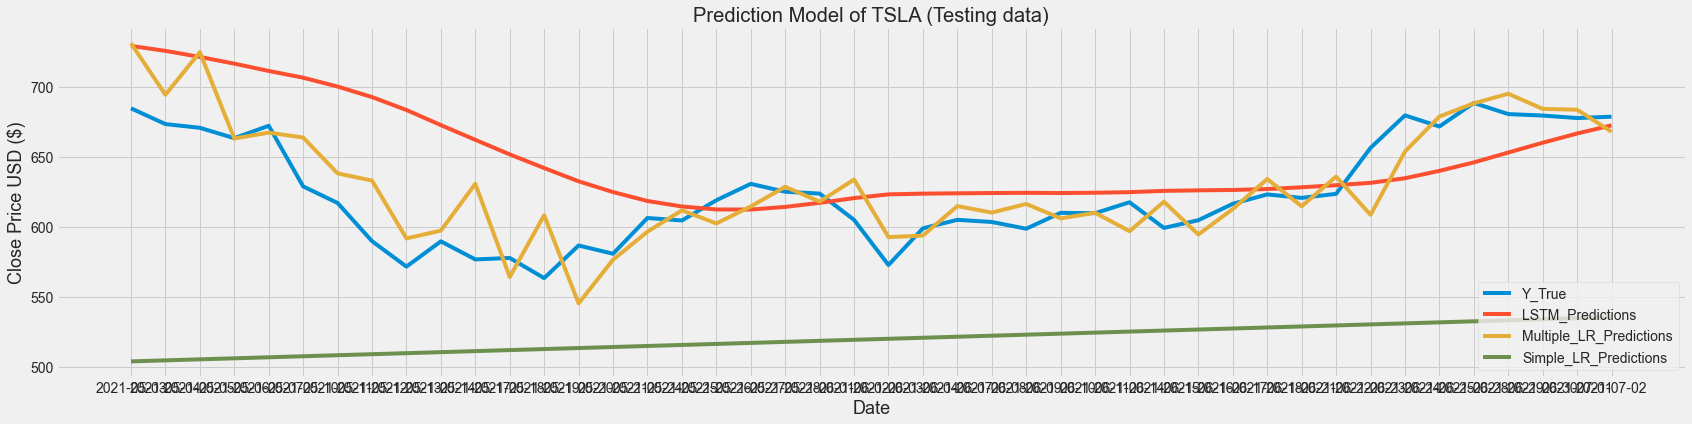

In [38]:
### Plot only Test Data

# testing data
valid = data[training_data_len:]
valid['LSTM_Predictions'] = predictions_origin_scale
valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale 
valid['Simple_LR_Predictions'] = lr_predictions_2 
# Visualize the data


plt.figure(figsize=(26,6))
plt.title('Prediction Model of TSLA (Testing data)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

trainDates = dates[:training_data_len]
validDates = dates[training_data_len:]
#plt.plot_date(trainDates, train, linestyle='solid', marker=None)
plt.plot_date(validDates, valid, linestyle='solid', marker=None)


plt.legend(['Y_True', 'LSTM_Predictions', 'Multiple_LR_Predictions', 'Simple_LR_Predictions'], loc='lower right')

plt.show()

In [39]:
### Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = y_test
LSTM_mse = mean_squared_error(y_true,predictions_origin_scale)
LSTM_mae =  mean_absolute_error(y_true,predictions_origin_scale)

lr_mse = mean_squared_error(y_true,lr_predictions_origin_scale )
lr_mae = mean_absolute_error(y_true,lr_predictions_origin_scale)

lr_mse_2 = mean_squared_error(y_true,lr_predictions_2 )
lr_mae_2 = mean_absolute_error(y_true,lr_predictions_2)

print('TSLA_LSTM_MSE: ', LSTM_mse, 'TSLA_LSTM_MAE: ', LSTM_mae)
print('TSLA_Multiple_Linear_Regression_MSE: ', lr_mse, 'TSLA_Multiple_Linear_Regression_MAE: ', lr_mae)
print('TSLA_Simple_Linear_Regression_MSE: ', lr_mse_2, 'TSLA_Simple Linear_Regression_MAE: ', lr_mae_2)

TSLA_LSTM_MSE:  2090.601501805558 TSLA_LSTM_MAE:  35.63605295099432
TSLA_Multiple_Linear_Regression_MSE:  533.6930631934107 TSLA_Multiple_Linear_Regression_MAE:  17.353498097945362
TSLA_Simple_Linear_Regression_MSE:  12235.398660770867 TSLA_Simple Linear_Regression_MAE:  104.9322130094277


In [40]:
# min_True
#真實的第二波修正數字 
# true value in the second corrective wave

min_T = np.min(y_true) 


#WAVE PRINCIPLE

#in the first principle

# March to October the first wave 
max = 880.799988
min = 72.244003

count0382 = max-(max - min) * 0.382
count05 = max-(max - min) * 0.5
count0618 = max-(max - min) * 0.618


#min_LSTM prediction 
min_LSM = np.min(valid['LSTM_Predictions'])
min_MLR = np.min(valid['Multiple_LR_Predictions'])
min_LR = np.min(valid['Simple_LR_Predictions'])




print('#TSLA wave principle comparison')
print('ture_min_value_in testing data: ',min_T )
print('Min_LSTM predition: ', min_LSM )
print ('Min_Multiple_LR prediction: ',min_MLR)
print ('Min_SLR prediction: ',min_LR)
print ('0.381 second corr wave: ', count0382)
print ('0.5 second corr wave: ', count05)
print ('0.618 second corr wave: ', count0618)
      


#TSLA wave principle comparison
ture_min_value_in testing data:  563.460022
Min_LSTM predition:  612.4849243164062
Min_Multiple_LR prediction:  545.3787870537976
Min_SLR prediction:  503.9065622938384
0.381 second corr wave:  571.93160173
0.5 second corr wave:  476.5219955
0.618 second corr wave:  381.11238927
